In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


### CARICO IL CSV E MI STAMPO L'HEAD PER UNA PRIMA ESPLORAZIONE 

In [33]:
df = pd.read_csv("DS_TelcoCustomerChurn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### STAMPO LE INFO PER CONTROLLARE I TIPI DA DATO E AGIRE DI CONSEGUENZA PER CONVERTIRLI 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### CORREGGO TIPO DI DATO DI TOTAL CHARGES CONVERTENDOLO IN FORMATO NUMERICO 


In [35]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


### GESTISCO I VALORI MANCANTI SOSTITUENDOLI CON LA MEDIANA 

In [36]:
print(df['TotalCharges'].isna().sum())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


11


### RIMUOVO LA COLONNA ID, INUTILE PER L'ANALISI 

In [37]:
df.drop('customerID', axis=1, inplace=True)


### CONVERTO CHURN IN NUMERICO 


In [38]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


### ENCODING DELLE VARIABILI CON GET_DUMMIES 


In [39]:
df = pd.get_dummies(df, drop_first=True)


### VERIFICO LA STRUTTURA DEL DF

In [40]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


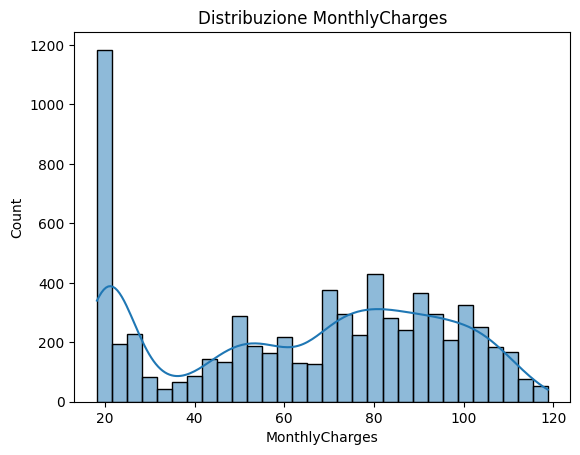

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title("Distribuzione MonthlyCharges")
plt.show()


## molti clienti hanno spese basse, mentre meno di clienti ha costi più elevati creando una coda a destra

### CLUSTERING NON SUP ESCUDENDO IL TARGET 

In [52]:
X_cluster = df.drop('Churn', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df['cluster'].value_counts()


cluster
2    4835
1    1526
0     682
Name: count, dtype: int64

### Calcolo delle medie delle principali variabili per ciascun cluster per analizzare e confrontare il profilo dei diversi gruppi di clienti


In [43]:
df.groupby('cluster')[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].mean()


,tenure,MonthlyCharges,TotalCharges,Churn
cluster,,,,
0,31.737537,42.028592,1500.131818,0.249267
1,33.036194,81.755171,2901.536975,0.328025
2,30.547182,21.079194,668.099443,0.074050


Il clustering ha identificato tre segmenti di clienti con caratteristiche economiche e comportamentali differenti. In particolare, il cluster ad alta spesa presenta il rischio di churn più elevato, mentre il cluster a basso costo mostra un’elevata fedeltà.

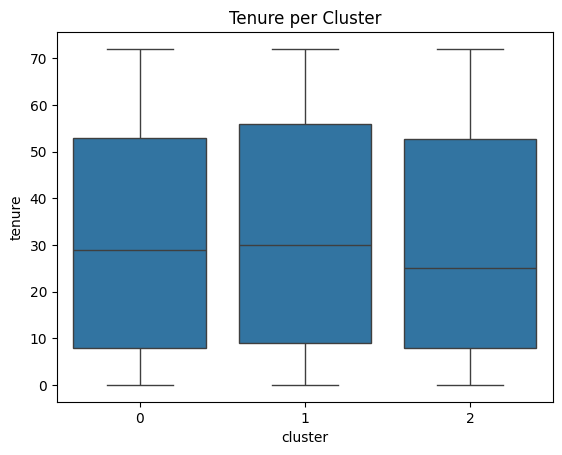

In [44]:
sns.boxplot(x='cluster', y='tenure', data=df)
plt.title("Tenure per Cluster")
plt.show()


In [45]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



c:\Users\39327\OneDrive\Documenti\GitHub\Brescia_DepositoCorso\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.46      0.55       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [47]:
df[['MonthlyCharges','TotalCharges']].describe()


,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2281.916928
std,30.090047,2265.270398
min,18.250000,18.800000
25%,35.500000,402.225000
50%,70.350000,1397.475000
75%,89.850000,3786.600000
max,118.750000,8684.800000


### INTRODUCO UNA NUOVA VARIABILE CHE RAPPRESENTA LA SPESA MEDIA MENSILE DEL CLIENTE 

In [48]:
df['avg_monthly_charge'] = df['TotalCharges'] / (df['tenure'] + 1)


In [49]:
X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(
    max_iter=2000,
    class_weight='balanced'
)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



L’introduzione della feature di spesa media mensile ha migliorato significativamente la capacità del modello di individuare i clienti a rischio churn, aumentando il recall della classe minoritaria dal 60% all’82%.

### MOSTRO IL TASSO MEDIO DI CHURN PER CIASCUNA CLUSTER PREMETTENDO DI COMPRENDERE IL RISCHI DI ABBONDONO DEI CLIENTI 

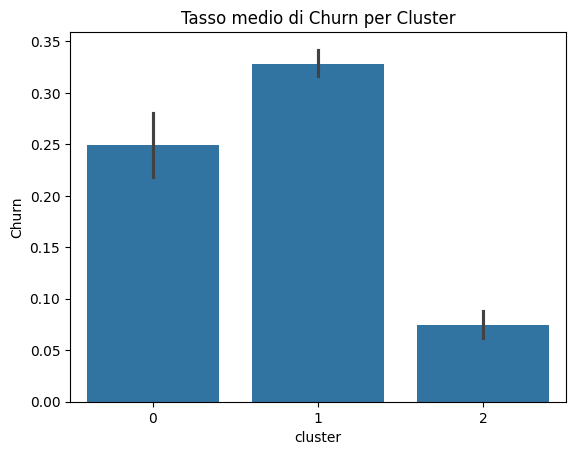

In [50]:
sns.barplot(x='cluster', y='Churn', data=df)
plt.title("Tasso medio di Churn per Cluster")
plt.show()


### CHURN PIU ALTO L'1, CLUSTER PIU A RISCHIO MENTRE IL CLUSTER 2 MOLTO BASSO(RISCHIO MINIMO DI ABBANDONO)